# Contando objetos en una imagen con OpenCV

En esta práctica aprenderemos los pasos básicos del proceso de contar objetos en una imagen estática.

La metodología de este ejercicio es parecido a otras prácticas que hemos realizado en el curso: leer la imagen, aplicar algún preprocesamiento, realizar la segmentación de los objetos y, por último, hacer la detección.

Una vez terminada la práctica puede expandir la aplicación para usarla en video, utilizar filtros más avanzados para mejorar el desempeño, etc.

In [6]:
# Importamos las librerías necesarias
import numpy as np
import matplotlib.pyplot as plt
# !pip install opencv-python # en caso de que no tengan instalado opencv
import cv2

In [7]:
# Comprobamos que tengamos instalado OpenCV
cv2.__version__

'4.5.1'

En esta celda cargamos la imagen desde disco y la pasamos a escala de grises para facilitar el procesamiento.

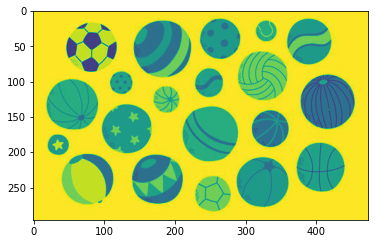

In [11]:
# Cargar la imagen desde disco
image = cv2.imread('pelotas.jpeg')
# Convertir la imagen a escala de grises
grayscale = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Mostrar la imagen original antes del preprocesamiento
plt.imshow(grayscale)

Aplicamos un desenfoque *gaussiano* para reducir el posible ruido.

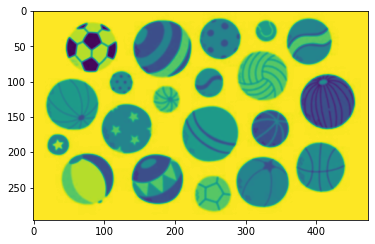

In [ ]:
grayscale = cv2.GaussianBlur(grayscale, (5,5), 0)
plt.imshow(grayscale)

# Por si quieren verlo con OpenCV
# cv2.imshow('Grayscale', grayscale)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

Uno de los métodos *tradicionales* para contar objetos (y también detectar contornos) es la **umbralización**, que es convertir los pixeles a blanco o negro (según sea el caso y según sea conveniente), es decir, todo los valores que no entren dentro de nuestro umbral, serán convertidos.

Para este caso, todos los pixeles que estén entre el umbral $[200, 255]$ (el fondo de color blanco) se convertirán en $0$ (negro), mientras que todo lo que no entre en el umbral pasará a tener un valor de $1$ (blanco).

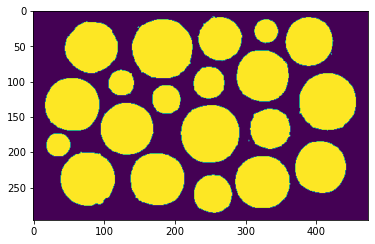

In [ ]:
_, binary = cv2.threshold(grayscale, # imagen a convertir 
                          250, 255, # valores mínimos y máximos
                          cv2.THRESH_BINARY_INV # método de binarización
                          )
plt.imshow(binary)

# Por si quieren verlo con OpenCV
# cv2.imshow('Binary', binary)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

Ahora que hemos realizado la binarización de la imagen, debemos encontrar los contornos de cada objeto dentro de la imagen, así podremos contarlos.

In [15]:
# Encontrar todos los contornos dentro de la imagen
contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Por si quieren visualizarlo en OpenCV
# cv2.imshow('Contornos', contours)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

# Dibujar los contornos y contar
count = 0

for contour in contours:
    area = cv2.contourArea(contour)
    print(f"Area: {area}")

    # Filtramos por tamaño para evitar falsos-positivos
    if area > 500 and area < 60500:
        cv2.drawContours(image, [contour], -1, (0, 255, 0), 2)
        count += 1

Area: 2218.0
Area: 4455.0
Area: 4439.5
Area: 4503.0
Area: 4079.5
Area: 0.0
Area: 844.0
Area: 2482.5
Area: 5269.0
Area: 4217.0
Area: 1251.5
Area: 4489.0
Area: 5053.5
Area: 990.0
Area: 1506.0
Area: 0.0
Area: 4180.5
Area: 4090.5
Area: 832.0
Area: 5609.5
Area: 3537.5
Area: 2864.0


In [16]:
# Mostramos los resultados
cv2.putText(image, f"Objetos detectados: {count}", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
cv2.imshow("Objetos Contados", image)
cv2.waitKey(0)
cv2.destroyAllWindows()

Si experimentan con otro tipo de imágenes u objetos como monedas o piezas de ajedrez comenzaran a notar que el programa no funciona de la mejor manera. En muchos casos, los contornos detectados serán muy pequeños que, aunque el valor de la variable `area` sea 0, no se podrán encontrar contornos.

Esto se debe a muchos factores como oclusión, solapamiento, contraste de la imagen bajo, el fondo de la imagen, entre otros. Uno de los principales es que usamos un **valor de umbral fijo**. El tener un valor fijo deriva en que el programa no se *adapta* al contexto de la imagen o a las condiciones en las que se tomo la imagen.

En este caso, nosotros trabajamos sobre una imagen por lo que tenemos esa *libertad* de poder ajustarnos a las condiciones a través de experimentar y ajustar los valores de umbralización. Sin embargo, si nos enfrentaramos a un video (una imagen cambiante por así decirlo) no podríamos estar ajustando en cada momento los valores. Actualmente, se han desarrollado nuevas metodologías, distintos tipos de filtros y transformaciónes para llegar a una "solución universal". La IA por ejemplo ha mostrado resultados interesantes y prometedores, pero eso es tema, quizá, para otro curso.